# Time Series Analysis and Forecasting with Prophet

This notebook demonstrates time series analysis and forecasting using the Prophet algorithm on sales data. We will load the data, visualize it, split it into training and test sets, fit a Prophet model, forecast future sales, and evaluate the forecast performance.

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

/Users/mac/.pyenv/versions/3.12.2/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


## Load and Explore the Sales Data
Load the sales data and inspect its structure, missing values, and basic statistics.

In [2]:
# Load the sales data
df = pd.read_csv('../s8-advanced-time-series-analysis/sales-data.csv', parse_dates=True)
df.head()

,date,sales
0,2020-01-01,1200
1,2020-02-01,1150
2,2020-03-01,1300
3,2020-04-01,1250
4,2020-05-01,1400


In [3]:
# Explore the data structure
df.info()
df.describe()
print("Missing values per column:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    72 non-null     object
 1   sales   72 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.3+ KB
Missing values per column:
 date     0
sales    0
dtype: int64


## Visualize the Time Series
Plot the sales data over time to observe trends, seasonality, and any irregularities.

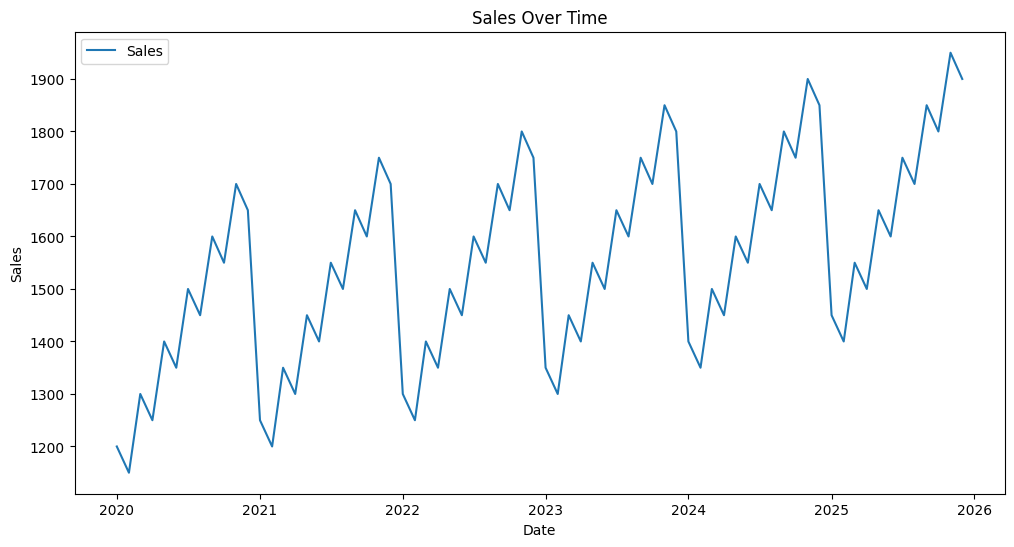

In [4]:
# Plot the sales time series
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')
plt.figure(figsize=(12,6))
plt.plot(df['sales'], label='Sales')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()
df = df.reset_index()  # Prophet requires columns, not index

## Split Data into Training and Test Sets
Split the time series into training and test sets, preserving the temporal order. Typically, the last 20% of the data is used as the test set.

In [5]:
# Split the data into training and test sets
split_idx = int(len(df) * 0.8)
train = df.iloc[:split_idx].copy()
test = df.iloc[split_idx:].copy()

# Prophet requires columns 'ds' and 'y'
train = train.rename(columns={'date': 'ds', 'sales': 'y'})
test = test.rename(columns={'date': 'ds', 'sales': 'y'})
print(f"Training set: {train.shape}")
print(f"Test set: {test.shape}")

Training set: (57, 2)
Test set: (15, 2)


## Fit Prophet Model on Training Data
Fit the Prophet model to the training data and display the model components.

16:40:50 - cmdstanpy - INFO - Chain [1] start processing
16:40:51 - cmdstanpy - INFO - Chain [1] done processing


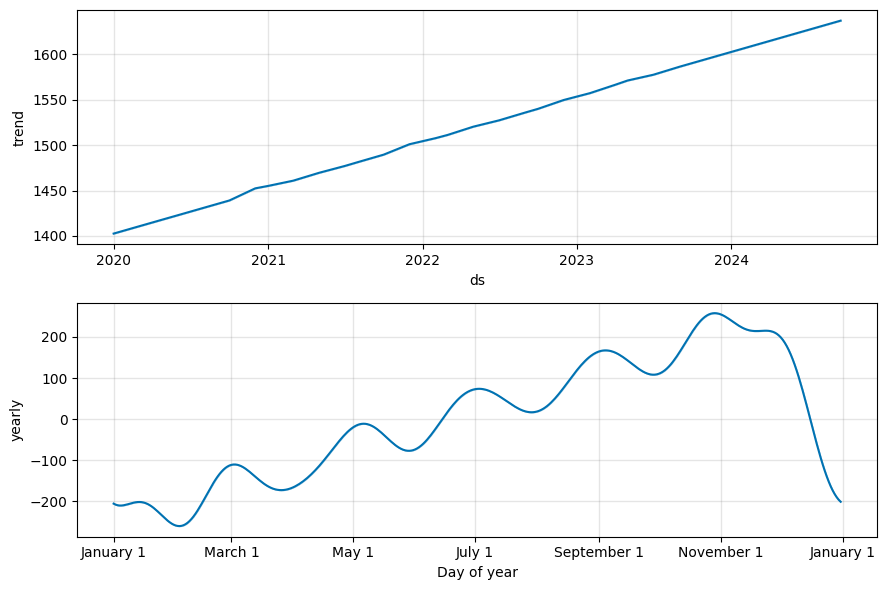

In [6]:
# Fit Prophet model
m = Prophet(yearly_seasonality=True, daily_seasonality=False)
m.fit(train)

# Plot model components
future = m.make_future_dataframe(periods=len(test), freq='D')
forecast = m.predict(future)
m.plot_components(forecast)
plt.show()

## Forecast Future Sales
Use the fitted Prophet model to forecast sales for the test period and plot the forecasts against actual sales.

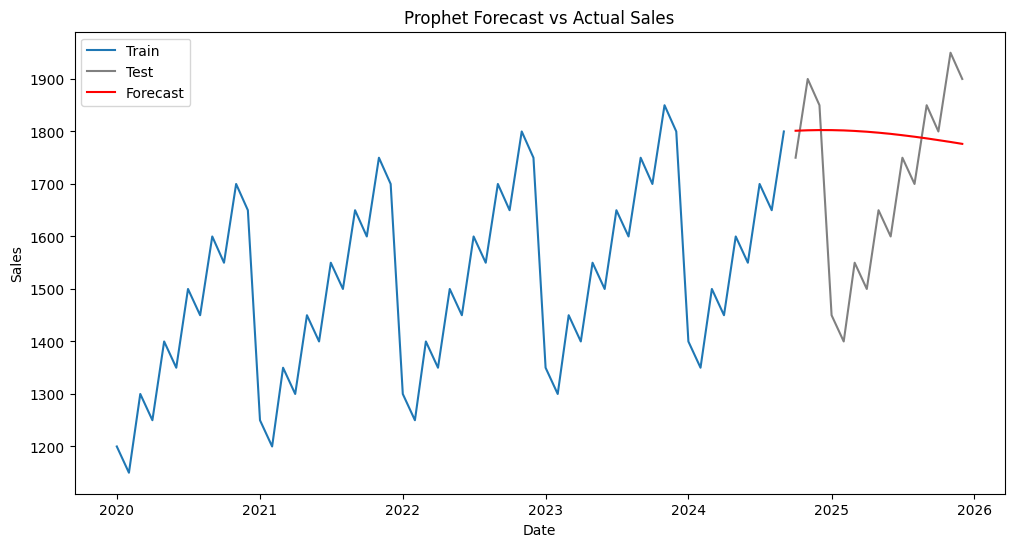

In [7]:
# Forecast for the test period
forecast_test = forecast.tail(len(test))
plt.figure(figsize=(12,6))
plt.plot(train['ds'], train['y'], label='Train')
plt.plot(test['ds'], test['y'], label='Test', color='gray')
plt.plot(test['ds'], forecast_test['yhat'].values, label='Forecast', color='red')
plt.fill_between(test['ds'], forecast_test['yhat_lower'], forecast_test['yhat_upper'], color='pink', alpha=0.3)
plt.title('Prophet Forecast vs Actual Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

## Evaluate Forecast Performance
Calculate evaluation metrics such as MAE, RMSE, and MAPE to assess the accuracy of the forecasts.

In [8]:
# Calculate evaluation metrics
mae = mean_absolute_error(test['y'], forecast_test['yhat'])
rmse = np.sqrt(mean_squared_error(test['y'], forecast_test['yhat']))
mape = np.mean(np.abs((test['y'] - forecast_test['yhat']) / test['y'])) * 100
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

MAE: 156.72
RMSE: 195.20
MAPE: 9.89%


## Conclusion
In this notebook, we performed time series analysis and forecasting using the Prophet algorithm on sales data. We explored the data, fit a Prophet model, made forecasts, and evaluated the results using standard metrics. Further improvements can be made by tuning Prophet's parameters and exploring additional features or models.